In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print("===== 5 Baris Teratas =====")
print(df.head())
print("===== Data Kosong ====")
print(df.isnull().sum())
print("===== Deskripsi Data =====")
print(df.describe())

===== 5 Baris Teratas =====
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

/tmp/ipython-input-28763099.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df,palette='coolwarm')


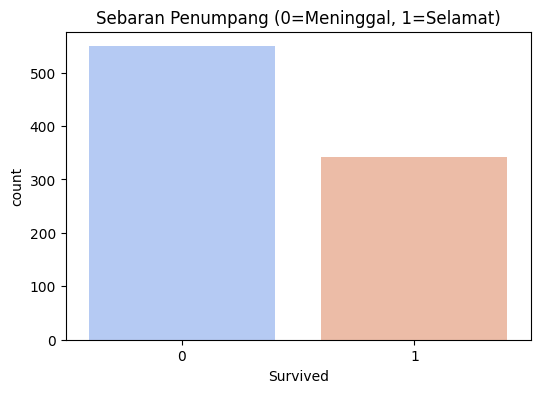

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived',data=df,palette='coolwarm')
plt.title("Sebaran Penumpang (0=Meninggal, 1=Selamat)")
plt.show()

Data Cleaning

In [4]:
df.drop(columns=['Cabin'], inplace=True)

median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

df.dropna(subset=['Embarked'], inplace=True)

df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

df['Sex'] = df['Sex'].map({'male':0, 'female':1})

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("===== Cleaned Data =====")
print(df.head())
print("===== Deskripsi Data =====")
print(df.describe())

===== Cleaned Data =====
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True
===== Deskripsi Data =====
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000   
mean     0.382452    2.311586    0.350956   29.315152    0.524184    0.382452   
std      0.486260    0.834700    0.477538   12.984932    1.103705    0.806761   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.0000

/tmp/ipython-input-1530268018.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


Training


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import seaborn as sns

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, ...)

In [8]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

Akurasi: 80.90%


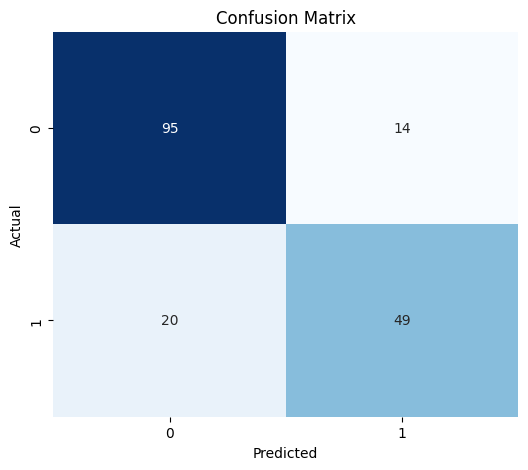

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Visualization


<Figure size 1000x600 with 0 Axes>

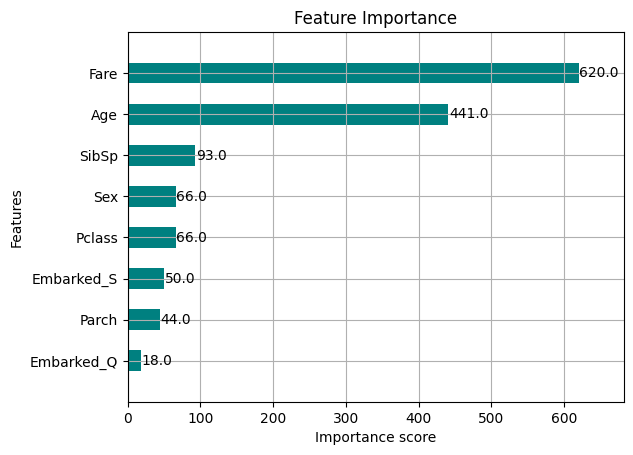

In [10]:
plt.figure(figsize=(10,6))

xgb.plot_importance(model, importance_type='weight', height=0.5, color='teal')
plt.title('Feature Importance')
plt.show()


/tmp/ipython-input-3001049993.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,0], data=df, x='Survived', y='Fare', palette='Set2')
/tmp/ipython-input-3001049993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0,1], data=df, x='Pclass', y='Survived', palette='viridis')
/tmp/ipython-input-3001049993.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1,0], data=df, x='Sex', y='Survived', palette='viridis')


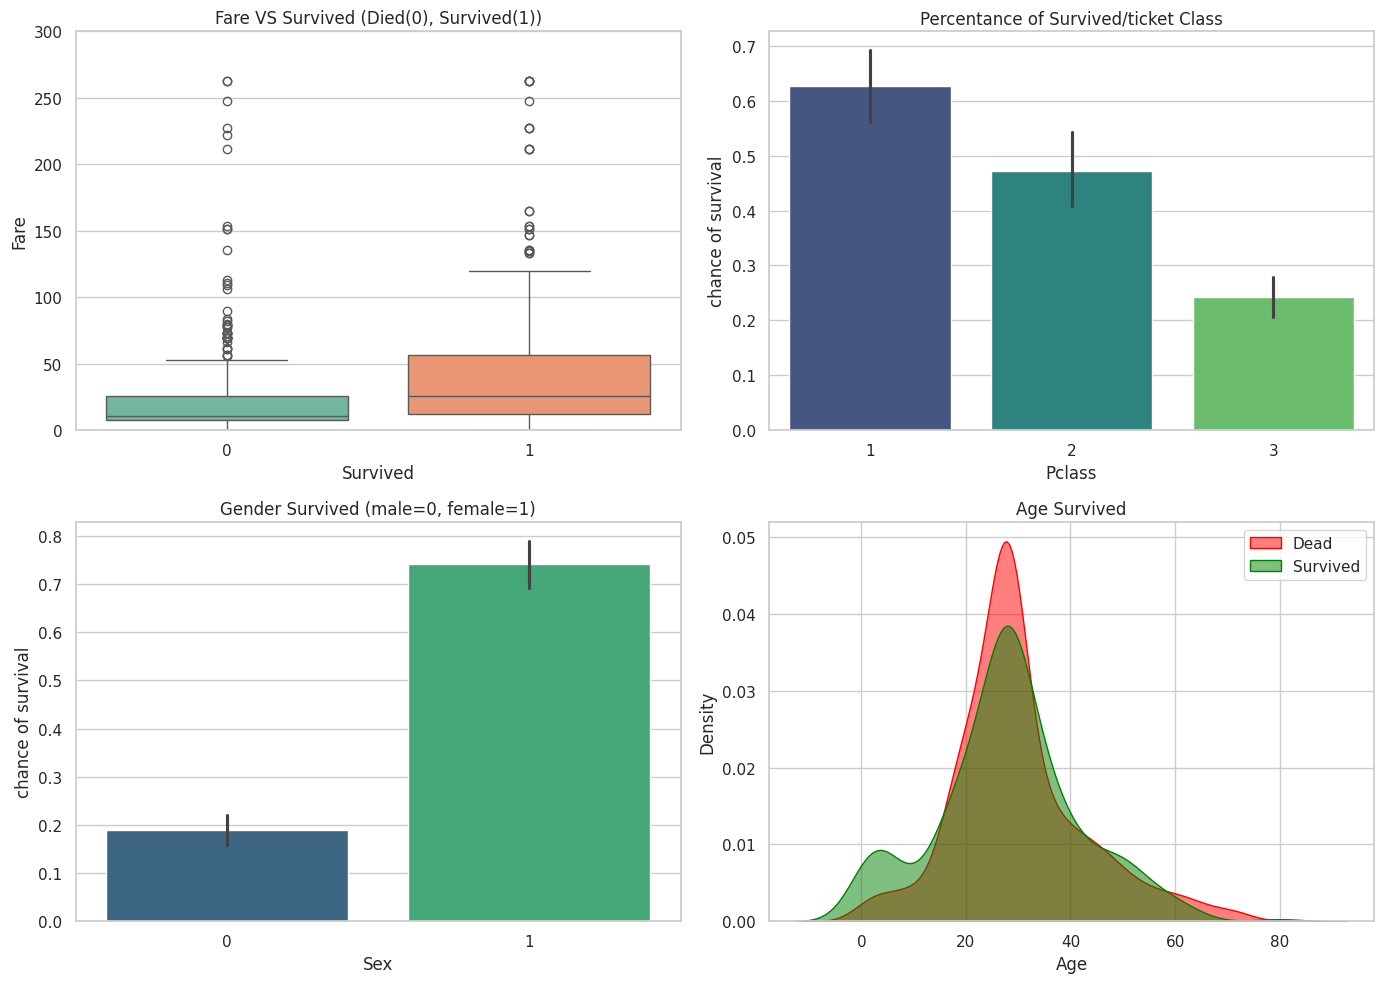

In [11]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2,figsize=(14,10))

# FARE VS SURVIVED
sns.boxplot(ax=axes[0,0], data=df, x='Survived', y='Fare', palette='Set2')
axes[0,0].set_title('Fare VS Survived (Died(0), Survived(1))')
axes[0,0].set_ylim(0,300)
# PCLASS VS SURVIVED
sns.barplot(ax=axes[0,1], data=df, x='Pclass', y='Survived', palette='viridis')
axes[0,1].set_title('Percentance of Survived/ticket Class')
axes[0,1].set_ylabel('chance of survival')
# SEX(GENDER) VS SURVIVED
sns.barplot(ax=axes[1,0], data=df, x='Sex', y='Survived', palette='viridis')
axes[1,0].set_title('Gender Survived (male=0, female=1)')
axes[1,0].set_ylabel('chance of survival')
# AGE VS SURVIVED
sns.kdeplot(ax=axes[1,1], data=df[df['Survived'] == 0], x='Age', fill=True,color='red',label='Dead', alpha=0.5)
sns.kdeplot(ax=axes[1,1], data=df[df['Survived'] == 1], x='Age', fill=True,color='green',label='Survived', alpha=0.5)
axes[1,1].set_title('Age Survived')
axes[1,1].legend()

plt.tight_layout()
plt.show()